<a id="1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import lazypredict
from lazypredict.Supervised import LazyClassifier
import xgboost as xgb

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from yellowbrick.model_selection import FeatureImportances

C:\Users\UTSHAB\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Processed Dataset from previous Notebook</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [2]:
plasma = pd.read_csv('plasma(Specific Metabolics)_final2.csv')
serum = pd.read_csv('serum(Specific Metabolics)_final2.csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

In [3]:
plasma

,asparagine,benzoic acid,tryptophan,uric acid,5-hydroxynorvaline NIST,alpha-ketoglutarate,citrulline,glutamine,hypoxanthine,malic acid,...,lactic acid,maltose,maltotriose,N-methylalanine,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine,Class
0,-0.38,-1.31,0.52,-1.02,-0.85,0.51,-0.33,-0.19,0.42,0.76,...,-0.04,-0.34,-1.21,-0.10,-0.10,0.03,-0.27,1.38,0.41,disease
1,0.95,-0.46,-0.90,-1.24,-0.82,-0.39,0.69,1.04,1.37,0.09,...,0.15,-0.29,-0.13,-1.19,0.22,-0.83,-0.41,0.29,-0.16,disease
2,0.69,-0.49,0.83,-0.23,-0.35,0.35,-0.56,0.36,-0.31,0.06,...,1.06,0.24,0.68,-0.71,0.98,0.02,0.95,-0.19,0.83,disease
3,0.35,1.68,-1.11,-0.48,-0.74,-0.75,-0.99,1.15,1.91,-0.41,...,0.53,-0.19,-0.38,1.83,0.69,-0.19,-0.59,-0.66,1.25,disease
4,0.30,-1.20,0.01,0.76,0.99,-0.14,0.77,-0.31,0.25,0.76,...,-0.33,-0.01,1.43,0.91,-0.27,0.32,0.52,-0.09,0.08,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.77,-0.63,0.98,0.05,-0.29,-0.30,0.08,1.06,-0.66,-0.97,...,-0.72,-0.35,-0.38,0.75,-0.68,-0.45,-0.96,-0.12,-0.37,control
78,-0.43,-1.06,-0.03,1.56,-0.20,-0.64,-0.41,-0.13,5.19,-0.67,...,0.64,-0.19,-0.60,0.51,0.79,-0.42,-0.22,-0.51,-0.23,control
79,-0.10,1.50,0.94,0.30,-0.08,0.78,0.91,1.47,-0.67,1.22,...,-0.53,-0.35,0.05,-0.94,-0.44,-0.24,-0.67,-0.36,-0.54,control
80,-1.22,0.90,-1.34,-0.01,-0.80,-0.14,-1.17,-1.39,-0.44,-0.09,...,-0.46,-0.50,-0.83,0.70,-0.18,-0.44,-0.92,-0.10,-1.05,control


Keep labels as an numpy array.

In [4]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

<a id="3"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Models</h1>

In [50]:
# !pip install lazypredict

In [5]:
from sklearn.feature_selection import RFECV

def rfecv_accuracy(plasma, meta_number, classifier):
    accuracy = []

    for i in range(1, meta_number+1):
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})

        if plasma.columns[-1]=='Class':
            X = plasma.drop('Class', axis=1)
        else:
            X = plasma

        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

        scaler = RobustScaler()
        cols = X.columns
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        X_train = pd.DataFrame(X_train, columns=[cols])
        X_test = pd.DataFrame(X_test, columns=[cols])

        y_train = y_train.values.reshape(-1, 1)
        y_test = y_test.values.reshape(-1, 1)

        rfecv = RFECV(
            estimator=RandomForestClassifier(),
            min_features_to_select=i,
            step=5,
            n_jobs=-1,
            scoring="accuracy",
            cv=10,
        )

        _ = rfecv.fit(X_train, y_train)

        meta_selected = []
        for j in range(i):
            meta_selected.append(X.columns[rfecv.support_][j])
        print(meta_selected)

        name = ['Plasma(Raw)']
        dfs = [plasma[meta_selected]]

        random_state = 42

        for idx, data in enumerate(dfs):
            result = []
            if data.columns[-1]=='Class':
                X = data.drop('Class', axis=1)
            else:
                X = data
            y = plasma['Class'].copy()
            y = y.map({"control": 0, "disease": 1})
    #         print(X, y)
            rs = ShuffleSplit(n_splits=10, test_size=0.2, random_state=random_state)

            for train_index, test_index in rs.split(X):
                clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                scaler = RobustScaler()

                cols = X_train.columns
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

                X_train = pd.DataFrame(X_train, columns=[cols])
                X_test = pd.DataFrame(X_test, columns=[cols])

                models, predictions = clf.fit(X_train, X_test, y_train, y_test)
                result.append(models)
            #     print(result)

            acc = []
            for a in range(10):
                acc.append(result[a].loc[classifier]['Balanced Accuracy'])

    #     print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([i, sum(acc)/ len(acc)])
        print(accuracy)
    return accuracy

#     accuracy_df1 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
#     accuracy_df1

# Plasma

### Accuracy Comparison Function

In [12]:
def accuracy2(data, classifier):
    plasma_accuracy = rfecv_accuracy(data, 26, classifier)

    plasma_accuracy = pd.DataFrame(plasma_accuracy, columns= ["Number of Metabolites", "Accuracy"])

    plasma_accuracy.to_csv(f"Plasma Accuracy {classifier}.csv", index=False)

    fig = plt.gcf()
    # plt.figure(figsize=(10, 6))

    plt.plot(plasma_accuracy["Number of Metabolites"], plasma_accuracy.Accuracy, 'o-')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Metabolites')
    # plt.title('Plasma RFECV Accuracy Plot')
    plt.xticks(np.arange(0, 26+1, 2))
    plt.show()
    fig.savefig(f'Plasma RFECV Accuracy Plot {classifier}.png', dpi=500)

### XGBClassifier

  3%|▎         | 1/29 [00:00<00:02,  9.65it/s]

['asparagine']


100%|██████████| 29/29 [00:00<00:00, 31.29it/s]


[[1, 0.6125543900543899]]


  3%|▎         | 1/29 [00:00<00:02, 10.00it/s]

['asparagine', 'benzoic acid']


100%|██████████| 29/29 [00:00<00:00, 30.63it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279]]


  3%|▎         | 1/29 [00:00<00:02,  9.99it/s]

['tryptophan', '5-hydroxynorvaline NIST', 'hypoxanthine']


100%|██████████| 29/29 [00:00<00:00, 30.28it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364]]


  3%|▎         | 1/29 [00:00<00:03,  9.23it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid']


100%|██████████| 29/29 [00:00<00:00, 31.18it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813]]


  3%|▎         | 1/29 [00:00<00:03,  9.20it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 30.35it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222]]


  7%|▋         | 2/29 [00:00<00:01, 16.09it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate']


100%|██████████| 29/29 [00:00<00:00, 29.89it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716]]


  7%|▋         | 2/29 [00:00<00:01, 15.62it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline']


100%|██████████| 29/29 [00:00<00:00, 30.94it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392]]


  3%|▎         | 1/29 [00:00<00:03,  9.14it/s]

['5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid']


100%|██████████| 29/29 [00:00<00:00, 32.10it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495]]


  3%|▎         | 1/29 [00:00<00:02,  9.67it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'malic acid', 'methionine sulfoxide']


100%|██████████| 29/29 [00:00<00:00, 31.69it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289]]


  3%|▎         | 1/29 [00:00<00:03,  9.06it/s]

['nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 30.44it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063]]


  3%|▎         | 1/29 [00:00<00:03,  9.23it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide']


100%|██████████| 29/29 [00:00<00:00, 29.94it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416]]


  3%|▎         | 1/29 [00:00<00:02,  9.39it/s]

['uric acid', '5-hydroxynorvaline NIST', 'citrulline', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'phenol']


100%|██████████| 29/29 [00:00<00:00, 29.91it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264]]


  3%|▎         | 1/29 [00:00<00:02,  9.87it/s]

['5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'N-methylalanine', 'phenol']


100%|██████████| 29/29 [00:01<00:00, 28.99it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784]]


  7%|▋         | 2/29 [00:00<00:01, 15.62it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 29.91it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763]]


  3%|▎         | 1/29 [00:00<00:03,  9.13it/s]

['benzoic acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:01<00:00, 28.15it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403]]


  7%|▋         | 2/29 [00:00<00:01, 14.16it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 29.48it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829]]


  7%|▋         | 2/29 [00:00<00:01, 16.02it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 30.32it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587]]


  7%|▋         | 2/29 [00:00<00:01, 15.27it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid']


100%|██████████| 29/29 [00:01<00:00, 28.32it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032]]


  3%|▎         | 1/29 [00:00<00:03,  8.82it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:01<00:00, 27.36it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032], [19, 0.7924912587412587]]


  3%|▎         | 1/29 [00:00<00:03,  8.32it/s]

['benzoic acid', 'tryptophan', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 30.22it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032], [19, 0.7924912587412587], [20, 0.7913170163170162]]


  3%|▎         | 1/29 [00:00<00:03,  8.83it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:01<00:00, 28.49it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032], [19, 0.7924912587412587], [20, 0.7913170163170162], [21, 0.798266317016317]]


  3%|▎         | 1/29 [00:00<00:03,  7.84it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 31.36it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032], [19, 0.7924912587412587], [20, 0.7913170163170162], [21, 0.798266317016317], [22, 0.7808420745920746]]


  3%|▎         | 1/29 [00:00<00:03,  9.18it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 29.66it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032], [19, 0.7924912587412587], [20, 0.7913170163170162], [21, 0.798266317016317], [22, 0.7808420745920746], [23, 0.7784430846930848]]


  3%|▎         | 1/29 [00:00<00:03,  8.95it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate']


100%|██████████| 29/29 [00:00<00:00, 29.90it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032], [19, 0.7924912587412587], [20, 0.7913170163170162], [21, 0.798266317016317], [22, 0.7808420745920746], [23, 0.7784430846930848], [24, 0.7634761072261073]]


  3%|▎         | 1/29 [00:00<00:03,  8.84it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:01<00:00, 28.17it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032], [19, 0.7924912587412587], [20, 0.7913170163170162], [21, 0.798266317016317], [22, 0.7808420745920746], [23, 0.7784430846930848], [24, 0.7634761072261073], [25, 0.7833041958041959]]


  3%|▎         | 1/29 [00:00<00:03,  9.05it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:01<00:00, 27.37it/s]


[[1, 0.6125543900543899], [2, 0.5678166278166279], [3, 0.7639413364413364], [4, 0.5737742812742813], [5, 0.6298776223776222], [6, 0.6265617715617716], [7, 0.6604885392385392], [8, 0.8059003496503495], [9, 0.704044289044289], [10, 0.7812160062160063], [11, 0.7478195415695416], [12, 0.7889180264180264], [13, 0.815243783993784], [14, 0.7700514763014763], [15, 0.7964986402486403], [16, 0.8042336829836829], [17, 0.8024912587412587], [18, 0.7969357031857032], [19, 0.7924912587412587], [20, 0.7913170163170162], [21, 0.798266317016317], [22, 0.7808420745920746], [23, 0.7784430846930848], [24, 0.7634761072261073], [25, 0.7833041958041959], [26, 0.7784430846930848]]


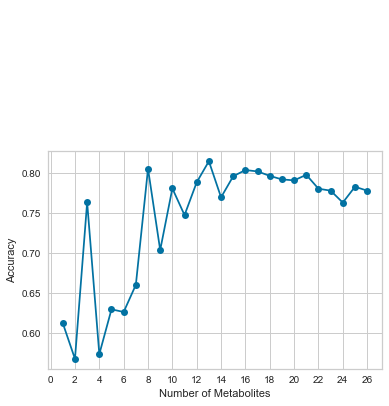

In [10]:
accuracy2(plasma, 'XGBClassifier')

### RFClassifier

  3%|▎         | 1/29 [00:00<00:02,  9.41it/s]

['asparagine']


100%|██████████| 29/29 [00:00<00:00, 30.88it/s]


[[1, 0.5982915695415694]]


  3%|▎         | 1/29 [00:00<00:03,  9.26it/s]

['benzoic acid', 'tryptophan']


100%|██████████| 29/29 [00:01<00:00, 24.70it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655]]


  3%|▎         | 1/29 [00:00<00:02,  9.52it/s]

['benzoic acid', 'tryptophan', 'uric acid']


100%|██████████| 29/29 [00:01<00:00, 26.72it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363]]


  3%|▎         | 1/29 [00:00<00:02,  9.61it/s]

['5-hydroxynorvaline NIST', 'glutamine', 'hypoxanthine', 'methionine sulfoxide']


100%|██████████| 29/29 [00:00<00:00, 42.37it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028]]


 14%|█▍        | 4/29 [00:00<00:00, 32.79it/s]

['5-hydroxynorvaline NIST', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine']


100%|██████████| 29/29 [00:00<00:00, 47.78it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791]]


 14%|█▍        | 4/29 [00:00<00:00, 34.19it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'hypoxanthine']


100%|██████████| 29/29 [00:00<00:00, 46.70it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177]]


 14%|█▍        | 4/29 [00:00<00:00, 33.33it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine']


100%|██████████| 29/29 [00:00<00:00, 46.77it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652]]


 14%|█▍        | 4/29 [00:00<00:00, 33.60it/s]

['benzoic acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine']


100%|██████████| 29/29 [00:00<00:00, 45.81it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578]]


 14%|█▍        | 4/29 [00:00<00:00, 32.80it/s]

['benzoic acid', 'tryptophan', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine']


100%|██████████| 29/29 [00:00<00:00, 45.95it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622]]


  7%|▋         | 2/29 [00:00<00:01, 17.55it/s]

['uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid']


100%|██████████| 29/29 [00:00<00:00, 45.60it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031]]


 14%|█▍        | 4/29 [00:00<00:00, 33.32it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide']


100%|██████████| 29/29 [00:00<00:00, 44.68it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701]]


 10%|█         | 3/29 [00:00<00:00, 29.99it/s]

['tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 43.09it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041]]


  7%|▋         | 2/29 [00:00<00:01, 19.61it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol']


100%|██████████| 29/29 [00:00<00:00, 46.47it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378]]


 14%|█▍        | 4/29 [00:00<00:00, 32.79it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 45.38it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921]]


 10%|█         | 3/29 [00:00<00:00, 29.13it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine']


100%|██████████| 29/29 [00:00<00:00, 45.17it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493]]


 10%|█         | 3/29 [00:00<00:00, 29.70it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 45.31it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152]]


 10%|█         | 3/29 [00:00<00:00, 27.78it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol']


100%|██████████| 29/29 [00:00<00:00, 43.41it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988]]


 10%|█         | 3/29 [00:00<00:00, 28.56it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 43.22it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699]]


  3%|▎         | 1/29 [00:00<00:03,  8.62it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:00<00:00, 43.54it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699], [19, 0.8087412587412587]]


 10%|█         | 3/29 [00:00<00:00, 29.86it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose']


100%|██████████| 29/29 [00:00<00:00, 40.28it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699], [19, 0.8087412587412587], [20, 0.8313374125874127]]


 10%|█         | 3/29 [00:00<00:00, 27.52it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 40.79it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699], [19, 0.8087412587412587], [20, 0.8313374125874127], [21, 0.8271707459207459]]


 10%|█         | 3/29 [00:00<00:00, 29.13it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol']


100%|██████████| 29/29 [00:00<00:00, 40.79it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699], [19, 0.8087412587412587], [20, 0.8313374125874127], [21, 0.8271707459207459], [22, 0.8392968142968144]]


  7%|▋         | 2/29 [00:00<00:01, 20.00it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 42.34it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699], [19, 0.8087412587412587], [20, 0.8313374125874127], [21, 0.8271707459207459], [22, 0.8392968142968144], [23, 0.7708041958041959]]


 10%|█         | 3/29 [00:00<00:00, 28.30it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 43.67it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699], [19, 0.8087412587412587], [20, 0.8313374125874127], [21, 0.8271707459207459], [22, 0.8392968142968144], [23, 0.7708041958041959], [24, 0.8281274281274282]]


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 42.58it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699], [19, 0.8087412587412587], [20, 0.8313374125874127], [21, 0.8271707459207459], [22, 0.8392968142968144], [23, 0.7708041958041959], [24, 0.8281274281274282], [25, 0.8079885392385393]]


 10%|█         | 3/29 [00:00<00:00, 28.57it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 42.96it/s]


[[1, 0.5982915695415694], [2, 0.607511655011655], [3, 0.6112082362082363], [4, 0.8365472027972028], [5, 0.7855040792540791], [6, 0.7763879176379177], [7, 0.7763626651126652], [8, 0.8264811577311578], [9, 0.8058323620823622], [10, 0.8094357031857031], [11, 0.7726631701631701], [12, 0.7854458041958041], [13, 0.8028399378399378], [14, 0.8233245920745921], [15, 0.8243395493395493], [16, 0.7965569153069152], [17, 0.8362567987567988], [18, 0.8323523698523699], [19, 0.8087412587412587], [20, 0.8313374125874127], [21, 0.8271707459207459], [22, 0.8392968142968144], [23, 0.7708041958041959], [24, 0.8281274281274282], [25, 0.8079885392385393], [26, 0.7773698523698525]]


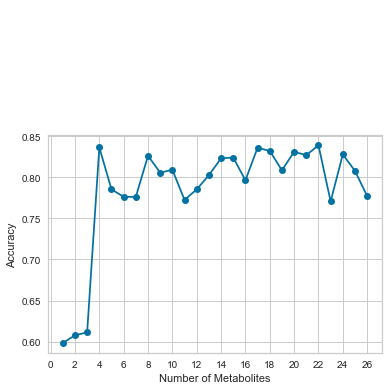

In [11]:
accuracy2(plasma, 'RandomForestClassifier')

### SVM

 14%|█▍        | 4/29 [00:00<00:00, 35.58it/s]

['5-methoxytryptamine']


100%|██████████| 29/29 [00:00<00:00, 49.18it/s]


[[1, 0.7227059052059053]]


 14%|█▍        | 4/29 [00:00<00:00, 34.48it/s]

['asparagine', 'benzoic acid']


100%|██████████| 29/29 [00:00<00:00, 48.16it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909]]


 14%|█▍        | 4/29 [00:00<00:00, 34.32it/s]

['asparagine', 'benzoic acid', 'tryptophan']


100%|██████████| 29/29 [00:00<00:00, 47.69it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143]]


 14%|█▍        | 4/29 [00:00<00:00, 33.39it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 47.22it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146]]


 14%|█▍        | 4/29 [00:00<00:00, 32.55it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 45.19it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782]]


 14%|█▍        | 4/29 [00:00<00:00, 34.86it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate']


100%|██████████| 29/29 [00:00<00:00, 47.65it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102]]


 14%|█▍        | 4/29 [00:00<00:00, 34.72it/s]

['benzoic acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 47.68it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035]]


 14%|█▍        | 4/29 [00:00<00:00, 33.06it/s]

['5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 46.01it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372]]


 10%|█         | 3/29 [00:00<00:00, 27.97it/s]

['benzoic acid', 'tryptophan', '5-hydroxynorvaline NIST', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine']


100%|██████████| 29/29 [00:00<00:00, 46.05it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899]]


 10%|█         | 3/29 [00:00<00:00, 29.72it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 46.78it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377]]


 14%|█▍        | 4/29 [00:00<00:00, 34.20it/s]

['5-hydroxynorvaline NIST', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:00<00:00, 47.45it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757]]


 14%|█▍        | 4/29 [00:00<00:00, 32.32it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine']


100%|██████████| 29/29 [00:00<00:00, 46.71it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436]]


 10%|█         | 3/29 [00:00<00:00, 29.70it/s]

['hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 47.07it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801]]


 14%|█▍        | 4/29 [00:00<00:00, 32.82it/s]

['5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.77it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897]]


 14%|█▍        | 4/29 [00:00<00:00, 33.07it/s]

['uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.62it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906]]


 14%|█▍        | 4/29 [00:00<00:00, 33.37it/s]

['tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:00<00:00, 46.49it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798]]


 14%|█▍        | 4/29 [00:00<00:00, 32.92it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 46.02it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565]]


 10%|█         | 3/29 [00:00<00:00, 29.61it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine']


100%|██████████| 29/29 [00:00<00:00, 45.02it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536]]


 10%|█         | 3/29 [00:00<00:00, 29.75it/s]

['asparagine', 'benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate']


100%|██████████| 29/29 [00:00<00:00, 45.24it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536], [19, 0.8543123543123542]]


 10%|█         | 3/29 [00:00<00:00, 29.51it/s]

['tryptophan', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.38it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536], [19, 0.8543123543123542], [20, 0.7916229603729603]]


 10%|█         | 3/29 [00:00<00:00, 29.41it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 45.68it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536], [19, 0.8543123543123542], [20, 0.7916229603729603], [21, 0.8285499222999222]]


  7%|▋         | 2/29 [00:00<00:01, 19.40it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 44.34it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536], [19, 0.8543123543123542], [20, 0.7916229603729603], [21, 0.8285499222999222], [22, 0.7906177156177157]]


 10%|█         | 3/29 [00:00<00:00, 28.99it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.34it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536], [19, 0.8543123543123542], [20, 0.7916229603729603], [21, 0.8285499222999222], [22, 0.7906177156177157], [23, 0.7978778166278165]]


 10%|█         | 3/29 [00:00<00:00, 29.29it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 43.02it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536], [19, 0.8543123543123542], [20, 0.7916229603729603], [21, 0.8285499222999222], [22, 0.7906177156177157], [23, 0.7978778166278165], [24, 0.7906177156177155]]


 10%|█         | 3/29 [00:00<00:00, 29.61it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 44.41it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536], [19, 0.8543123543123542], [20, 0.7916229603729603], [21, 0.8285499222999222], [22, 0.7906177156177157], [23, 0.7978778166278165], [24, 0.7906177156177155], [25, 0.7920066045066045]]


 14%|█▍        | 4/29 [00:00<00:00, 33.06it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 43.43it/s]


[[1, 0.7227059052059053], [2, 0.6848144910644909], [3, 0.6892968142968143], [4, 0.6146853146853146], [5, 0.7657439782439782], [6, 0.7102564102564102], [7, 0.7784965034965035], [8, 0.7521406371406372], [9, 0.7987266899766899], [10, 0.810595376845377], [11, 0.8195852758352757], [12, 0.8022620435120436], [13, 0.8115141802641801], [14, 0.8271658896658897], [15, 0.7906759906759906], [16, 0.7923756798756798], [17, 0.8125825563325565], [18, 0.8348630536130536], [19, 0.8543123543123542], [20, 0.7916229603729603], [21, 0.8285499222999222], [22, 0.7906177156177157], [23, 0.7978778166278165], [24, 0.7906177156177155], [25, 0.7920066045066045], [26, 0.8083576146076148]]


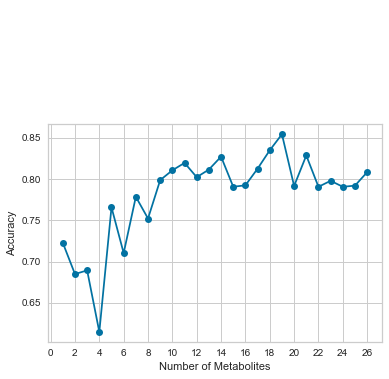

In [16]:
accuracy2(plasma, 'SVC')

### DT

 14%|█▍        | 4/29 [00:00<00:00, 33.94it/s]

['benzoic acid']


100%|██████████| 29/29 [00:00<00:00, 48.52it/s]


[[1, 0.6213908313908314]]


 14%|█▍        | 4/29 [00:00<00:00, 34.24it/s]

['uric acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 48.33it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651]]


 14%|█▍        | 4/29 [00:00<00:00, 33.86it/s]

['hypoxanthine', 'methionine sulfoxide', 'nornicotine']


100%|██████████| 29/29 [00:00<00:00, 48.26it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516]]


 14%|█▍        | 4/29 [00:00<00:00, 33.91it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 45.91it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189]]


 14%|█▍        | 4/29 [00:00<00:00, 33.90it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide']


100%|██████████| 29/29 [00:00<00:00, 47.26it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811]]


 14%|█▍        | 4/29 [00:00<00:00, 33.85it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'citrulline', 'hypoxanthine']


100%|██████████| 29/29 [00:00<00:00, 46.35it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219]]


 14%|█▍        | 4/29 [00:00<00:00, 34.20it/s]

['5-hydroxynorvaline NIST', 'methionine sulfoxide', 'nornicotine', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid']


100%|██████████| 29/29 [00:00<00:00, 46.88it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744]]


 14%|█▍        | 4/29 [00:00<00:00, 33.63it/s]

['benzoic acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 46.80it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253]]


 14%|█▍        | 4/29 [00:00<00:00, 33.66it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine']


100%|██████████| 29/29 [00:00<00:00, 44.03it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393]]


 10%|█         | 3/29 [00:00<00:00, 28.21it/s]

['5-hydroxynorvaline NIST', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'phenol', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.15it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423]]


 14%|█▍        | 4/29 [00:00<00:00, 33.88it/s]

['5-hydroxynorvaline NIST', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'phenol', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.18it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542]]


 14%|█▍        | 4/29 [00:00<00:00, 33.65it/s]

['5-hydroxynorvaline NIST', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.81it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402]]


 10%|█         | 3/29 [00:00<00:00, 29.75it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol']


100%|██████████| 29/29 [00:00<00:00, 46.68it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156]]


 10%|█         | 3/29 [00:00<00:00, 29.33it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 46.49it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089]]


 14%|█▍        | 4/29 [00:00<00:00, 32.79it/s]

['5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.45it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944]]


 10%|█         | 3/29 [00:00<00:00, 28.66it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 46.23it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499]]


 10%|█         | 3/29 [00:00<00:00, 28.42it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol']


100%|██████████| 29/29 [00:00<00:00, 45.82it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359]]


 10%|█         | 3/29 [00:00<00:00, 29.71it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine']


100%|██████████| 29/29 [00:00<00:00, 45.86it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179]]


 10%|█         | 3/29 [00:00<00:00, 28.64it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:00<00:00, 45.85it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179], [19, 0.758180846930847]]


 10%|█         | 3/29 [00:00<00:00, 29.44it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 44.73it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179], [19, 0.758180846930847], [20, 0.7506934731934732]]


 10%|█         | 3/29 [00:00<00:00, 28.64it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 45.57it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179], [19, 0.758180846930847], [20, 0.7506934731934732], [21, 0.7477010489510489]]


 10%|█         | 3/29 [00:00<00:00, 28.24it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.18it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179], [19, 0.758180846930847], [20, 0.7506934731934732], [21, 0.7477010489510489], [22, 0.7409178321678322]]


 10%|█         | 3/29 [00:00<00:00, 29.13it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine']


100%|██████████| 29/29 [00:00<00:00, 45.60it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179], [19, 0.758180846930847], [20, 0.7506934731934732], [21, 0.7477010489510489], [22, 0.7409178321678322], [23, 0.7107944832944834]]


 10%|█         | 3/29 [00:00<00:00, 29.40it/s]

['asparagine', 'benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 42.70it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179], [19, 0.758180846930847], [20, 0.7506934731934732], [21, 0.7477010489510489], [22, 0.7409178321678322], [23, 0.7107944832944834], [24, 0.726965811965812]]


  7%|▋         | 2/29 [00:00<00:01, 16.26it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid']


100%|██████████| 29/29 [00:00<00:00, 46.80it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179], [19, 0.758180846930847], [20, 0.7506934731934732], [21, 0.7477010489510489], [22, 0.7409178321678322], [23, 0.7107944832944834], [24, 0.726965811965812], [25, 0.722221250971251]]


 10%|█         | 3/29 [00:00<00:00, 27.90it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.19it/s]


[[1, 0.6213908313908314], [2, 0.5226126651126651], [3, 0.778428515928516], [4, 0.6702088189588189], [5, 0.773688811188811], [6, 0.7116783216783219], [7, 0.7679535742035744], [8, 0.7815802253302253], [9, 0.655662393162393], [10, 0.7735188422688423], [11, 0.7443900543900542], [12, 0.7864986402486402], [13, 0.6656954156954156], [14, 0.6526078088578089], [15, 0.7844055944055944], [16, 0.7674611499611499], [17, 0.7633197358197359], [18, 0.7079487179487179], [19, 0.758180846930847], [20, 0.7506934731934732], [21, 0.7477010489510489], [22, 0.7409178321678322], [23, 0.7107944832944834], [24, 0.726965811965812], [25, 0.722221250971251], [26, 0.752786519036519]]


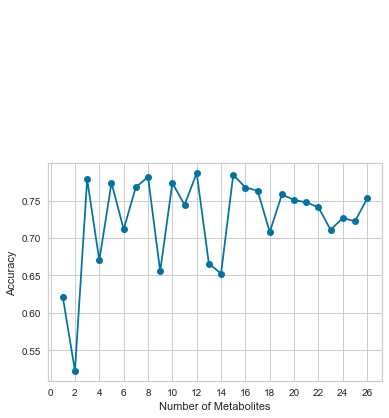

In [32]:
accuracy2(plasma, 'DecisionTreeClassifier')

### NB

 14%|█▍        | 4/29 [00:00<00:00, 33.70it/s]

['benzoic acid']


100%|██████████| 29/29 [00:00<00:00, 48.21it/s]


[[1, 0.5789180264180265]]


 14%|█▍        | 4/29 [00:00<00:00, 34.15it/s]

['uric acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 48.36it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897]]


 14%|█▍        | 4/29 [00:00<00:00, 34.10it/s]

['5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine']


100%|██████████| 29/29 [00:00<00:00, 46.88it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308]]


 14%|█▍        | 4/29 [00:00<00:00, 34.89it/s]

['benzoic acid', 'tryptophan', 'uric acid', 'alpha-ketoglutarate']


100%|██████████| 29/29 [00:00<00:00, 47.20it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123]]


 14%|█▍        | 4/29 [00:00<00:00, 33.58it/s]

['5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 47.70it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435]]


 14%|█▍        | 4/29 [00:00<00:00, 34.03it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate']


100%|██████████| 29/29 [00:00<00:00, 47.82it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351]]


 14%|█▍        | 4/29 [00:00<00:00, 33.96it/s]

['5-hydroxynorvaline NIST', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 46.52it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857]]


 10%|█         | 3/29 [00:00<00:00, 28.85it/s]

['5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 46.67it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358]]


 14%|█▍        | 4/29 [00:00<00:00, 33.80it/s]

['methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'phenol', 'pyrophosphate']


100%|██████████| 29/29 [00:00<00:00, 45.04it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122]]


 14%|█▍        | 4/29 [00:00<00:00, 33.96it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 44.69it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172]]


 10%|█         | 3/29 [00:00<00:00, 29.58it/s]

['benzoic acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:00<00:00, 45.92it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912]]


 14%|█▍        | 4/29 [00:00<00:00, 33.18it/s]

['hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'lactic acid', 'maltose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.76it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897]]


 14%|█▍        | 4/29 [00:00<00:00, 33.26it/s]

['5-hydroxynorvaline NIST', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.08it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813]]


 10%|█         | 3/29 [00:00<00:00, 29.99it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 45.29it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378]]


 10%|█         | 3/29 [00:00<00:00, 29.96it/s]

['5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.33it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352]]


 14%|█▍        | 4/29 [00:00<00:00, 32.05it/s]

['uric acid', '5-hydroxynorvaline NIST', 'citrulline', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.78it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122]]


 10%|█         | 3/29 [00:00<00:00, 27.76it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 45.45it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452]]


 10%|█         | 3/29 [00:00<00:00, 28.73it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.51it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029]]


 10%|█         | 3/29 [00:00<00:00, 29.10it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:00<00:00, 43.65it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029], [19, 0.7615093240093239]]


 10%|█         | 3/29 [00:00<00:00, 28.06it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid']


100%|██████████| 29/29 [00:00<00:00, 43.73it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029], [19, 0.7615093240093239], [20, 0.7417871017871016]]


 10%|█         | 3/29 [00:00<00:00, 28.43it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'citrulline', 'glutamine', 'hypoxanthine', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.02it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029], [19, 0.7615093240093239], [20, 0.7417871017871016], [21, 0.7659965034965035]]


 10%|█         | 3/29 [00:00<00:00, 29.20it/s]

['uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 44.39it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029], [19, 0.7615093240093239], [20, 0.7417871017871016], [21, 0.7659965034965035], [22, 0.7600621600621601]]


 10%|█         | 3/29 [00:00<00:00, 28.79it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine']


100%|██████████| 29/29 [00:00<00:00, 44.11it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029], [19, 0.7615093240093239], [20, 0.7417871017871016], [21, 0.7659965034965035], [22, 0.7600621600621601], [23, 0.7772037684537683]]


 10%|█         | 3/29 [00:00<00:00, 28.43it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate']


100%|██████████| 29/29 [00:00<00:00, 44.60it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029], [19, 0.7615093240093239], [20, 0.7417871017871016], [21, 0.7659965034965035], [22, 0.7600621600621601], [23, 0.7772037684537683], [24, 0.7772037684537683]]


 10%|█         | 3/29 [00:00<00:00, 28.95it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid']


100%|██████████| 29/29 [00:00<00:00, 37.74it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029], [19, 0.7615093240093239], [20, 0.7417871017871016], [21, 0.7659965034965035], [22, 0.7600621600621601], [23, 0.7772037684537683], [24, 0.7772037684537683], [25, 0.7695697358197358]]


  3%|▎         | 1/29 [00:00<00:03,  9.20it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 42.62it/s]


[[1, 0.5789180264180265], [2, 0.5759935897435897], [3, 0.6670192307692308], [4, 0.6235266122766123], [5, 0.7123397435897435], [6, 0.6526981351981351], [7, 0.782031857031857], [8, 0.7608197358197358], [9, 0.809489121989122], [10, 0.7385771173271172], [11, 0.8038752913752912], [12, 0.7959158896658897], [13, 0.7875242812742813], [14, 0.7465899378399378], [15, 0.7976204351204352], [16, 0.790739121989122], [17, 0.7889714452214452], [18, 0.7777972027972029], [19, 0.7615093240093239], [20, 0.7417871017871016], [21, 0.7659965034965035], [22, 0.7600621600621601], [23, 0.7772037684537683], [24, 0.7772037684537683], [25, 0.7695697358197358], [26, 0.7600621600621601]]


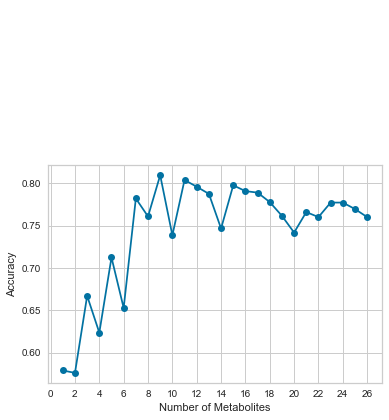

In [33]:
accuracy2(plasma, 'GaussianNB')

# Serum

In [25]:
def accuracy2_serum(classifier):
    serum_accuracy = rfecv_accuracy(serum, 16, classifier)
    serum_accuracy = pd.DataFrame(serum_accuracy, columns= ["Number of Metabolites", "Accuracy"])
    serum_accuracy.to_csv(f"Serum Accuracy {classifier}.csv", index=False)
    fig = plt.gcf()
    # plt.figure(figsize=(10, 6))
    plt.plot(serum_accuracy["Number of Metabolites"], serum_accuracy.Accuracy, 'o-')
    plt.ylim([0.55, 0.95])
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Metabolites')
    # plt.title('Serum RFECV Accuracy Plot')
    plt.xticks(np.arange(0, 16+1, 2))
    plt.show()
    fig.savefig(f'Serum RFECV Accuracy Plot {classifier}.png', dpi=500)

 10%|█         | 3/29 [00:00<00:00, 28.07it/s]

['cholesterol']


100%|██████████| 29/29 [00:00<00:00, 49.52it/s]


[[1, 0.6347008547008546]]


  7%|▋         | 2/29 [00:00<00:01, 16.61it/s]

['cholesterol', 'threonine']


100%|██████████| 29/29 [00:00<00:00, 48.90it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352]]


 10%|█         | 3/29 [00:00<00:00, 28.85it/s]

['cholesterol', 'threonine', 'uric acid']


100%|██████████| 29/29 [00:00<00:00, 47.77it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496]]


  7%|▋         | 2/29 [00:00<00:01, 16.81it/s]

['cholesterol', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine']


100%|██████████| 29/29 [00:00<00:00, 34.68it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852]]


  3%|▎         | 1/29 [00:00<00:03,  9.18it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 33.09it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853]]


 14%|█▍        | 4/29 [00:00<00:00, 33.61it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine']


100%|██████████| 29/29 [00:00<00:00, 46.91it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843]]


  7%|▋         | 2/29 [00:00<00:01, 18.72it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid']


100%|██████████| 29/29 [00:00<00:00, 48.00it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953]]


 10%|█         | 3/29 [00:00<00:00, 28.58it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 47.55it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398]]


 10%|█         | 3/29 [00:00<00:00, 27.78it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine']


100%|██████████| 29/29 [00:00<00:00, 45.47it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398], [9, 0.6704584304584305]]


 14%|█▍        | 4/29 [00:00<00:00, 33.30it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid']


100%|██████████| 29/29 [00:00<00:00, 47.47it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398], [9, 0.6704584304584305], [10, 0.7087111499611499]]


 14%|█▍        | 4/29 [00:00<00:00, 33.71it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 45.75it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398], [9, 0.6704584304584305], [10, 0.7087111499611499], [11, 0.7441278166278166]]


 14%|█▍        | 4/29 [00:00<00:00, 34.20it/s]

['cholesterol', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'N-methylalanine', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 47.12it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398], [9, 0.6704584304584305], [10, 0.7087111499611499], [11, 0.7441278166278166], [12, 0.6996406371406371]]


 14%|█▍        | 4/29 [00:00<00:00, 33.32it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid']


100%|██████████| 29/29 [00:00<00:00, 41.11it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398], [9, 0.6704584304584305], [10, 0.7087111499611499], [11, 0.7441278166278166], [12, 0.6996406371406371], [13, 0.7540646853146854]]


 10%|█         | 3/29 [00:00<00:00, 27.87it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 40.96it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398], [9, 0.6704584304584305], [10, 0.7087111499611499], [11, 0.7441278166278166], [12, 0.6996406371406371], [13, 0.7540646853146854], [14, 0.7204632867132869]]


 10%|█         | 3/29 [00:00<00:00, 28.17it/s]

['cholesterol', 'threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.72it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398], [9, 0.6704584304584305], [10, 0.7087111499611499], [11, 0.7441278166278166], [12, 0.6996406371406371], [13, 0.7540646853146854], [14, 0.7204632867132869], [15, 0.7210470085470086]]


 10%|█         | 3/29 [00:00<00:00, 29.48it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 44.36it/s]


[[1, 0.6347008547008546], [2, 0.638231351981352], [3, 0.6796503496503496], [4, 0.7315646853146852], [5, 0.6403146853146853], [6, 0.6705545843045843], [7, 0.6916656954156953], [8, 0.6798601398601398], [9, 0.6704584304584305], [10, 0.7087111499611499], [11, 0.7441278166278166], [12, 0.6996406371406371], [13, 0.7540646853146854], [14, 0.7204632867132869], [15, 0.7210470085470086], [16, 0.6748397435897436]]


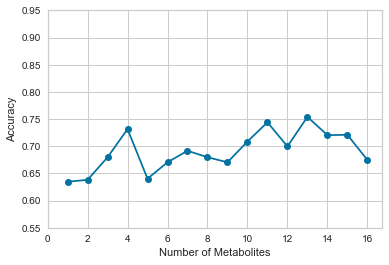

In [26]:
accuracy2_serum('RidgeClassifier')

 14%|█▍        | 4/29 [00:00<00:00, 33.92it/s]

['cholesterol']


100%|██████████| 29/29 [00:00<00:00, 47.98it/s]


[[1, 0.6287082362082361]]


 14%|█▍        | 4/29 [00:00<00:00, 35.07it/s]

['cholesterol', 'threonine']


100%|██████████| 29/29 [00:00<00:00, 47.91it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815]]


 14%|█▍        | 4/29 [00:00<00:00, 34.52it/s]

['threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 47.55it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903]]


 14%|█▍        | 4/29 [00:00<00:00, 34.21it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid']


100%|██████████| 29/29 [00:00<00:00, 47.24it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226]]


 14%|█▍        | 4/29 [00:00<00:00, 35.09it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 47.28it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449]]


 10%|█         | 3/29 [00:00<00:00, 29.10it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine']


100%|██████████| 29/29 [00:00<00:00, 46.26it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628]]


 10%|█         | 3/29 [00:00<00:00, 27.30it/s]

['threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 46.79it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066]]


 14%|█▍        | 4/29 [00:00<00:00, 33.03it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 44.18it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373]]


 14%|█▍        | 4/29 [00:00<00:00, 33.04it/s]

['cholesterol', 'threonine', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'aspartic acid', 'deoxypentitol', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 47.72it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373], [9, 0.8047639860139861]]


 14%|█▍        | 4/29 [00:00<00:00, 33.06it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid']


100%|██████████| 29/29 [00:00<00:00, 47.32it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373], [9, 0.8047639860139861], [10, 0.791029526029526]]


 14%|█▍        | 4/29 [00:00<00:00, 32.96it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 46.52it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373], [9, 0.8047639860139861], [10, 0.791029526029526], [11, 0.8327214452214452]]


 10%|█         | 3/29 [00:00<00:00, 30.00it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol']


100%|██████████| 29/29 [00:00<00:00, 45.30it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373], [9, 0.8047639860139861], [10, 0.791029526029526], [11, 0.8327214452214452], [12, 0.8041229603729605]]


  3%|▎         | 1/29 [00:00<00:03,  9.01it/s]

['cholesterol', 'threonine', 'uric acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 43.54it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373], [9, 0.8047639860139861], [10, 0.791029526029526], [11, 0.8327214452214452], [12, 0.8041229603729605], [13, 0.820158313908314]]


  7%|▋         | 2/29 [00:00<00:01, 19.16it/s]

['cholesterol', 'threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.71it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373], [9, 0.8047639860139861], [10, 0.791029526029526], [11, 0.8327214452214452], [12, 0.8041229603729605], [13, 0.820158313908314], [14, 0.7881555944055945]]


 10%|█         | 3/29 [00:00<00:00, 29.33it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol']


100%|██████████| 29/29 [00:00<00:00, 47.63it/s]


[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373], [9, 0.8047639860139861], [10, 0.791029526029526], [11, 0.8327214452214452], [12, 0.8041229603729605], [13, 0.820158313908314], [14, 0.7881555944055945], [15, 0.8170648795648795]]


  7%|▋         | 2/29 [00:00<00:01, 19.76it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.65it/s]

[[1, 0.6287082362082361], [2, 0.5616627816627815], [3, 0.6103651903651903], [4, 0.5801884226884226], [5, 0.6899106449106449], [6, 0.7177039627039628], [7, 0.7965268065268066], [8, 0.7833906371406373], [9, 0.8047639860139861], [10, 0.791029526029526], [11, 0.8327214452214452], [12, 0.8041229603729605], [13, 0.820158313908314], [14, 0.7881555944055945], [15, 0.8170648795648795], [16, 0.7915695415695417]]


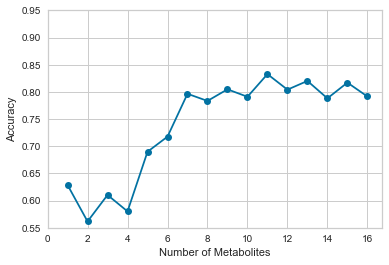

In [27]:
accuracy2_serum('RandomForestClassifier')

 14%|█▍        | 4/29 [00:00<00:00, 34.76it/s]

['cholesterol']


100%|██████████| 29/29 [00:00<00:00, 48.50it/s]


[[1, 0.6299028749028749]]


 10%|█         | 3/29 [00:00<00:00, 29.13it/s]

['cholesterol', 'threonine']


100%|██████████| 29/29 [00:00<00:00, 48.39it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491]]


  7%|▋         | 2/29 [00:00<00:01, 15.33it/s]

['cholesterol', 'threonine', 'uric acid']


100%|██████████| 29/29 [00:00<00:00, 46.68it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224]]


 14%|█▍        | 4/29 [00:00<00:00, 34.52it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid']


100%|██████████| 29/29 [00:00<00:00, 46.77it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359]]


 10%|█         | 3/29 [00:00<00:00, 28.09it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 45.67it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958]]


 14%|█▍        | 4/29 [00:00<00:00, 34.50it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine']


100%|██████████| 29/29 [00:00<00:00, 47.92it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809]]


 14%|█▍        | 4/29 [00:00<00:00, 33.90it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid']


100%|██████████| 29/29 [00:00<00:00, 48.05it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108]]


 14%|█▍        | 4/29 [00:00<00:00, 34.01it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 45.99it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206]]


 14%|█▍        | 4/29 [00:00<00:00, 33.16it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine']


100%|██████████| 29/29 [00:00<00:00, 45.90it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206], [9, 0.684814491064491]]


 10%|█         | 3/29 [00:00<00:00, 29.11it/s]

['cholesterol', 'threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 47.15it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206], [9, 0.684814491064491], [10, 0.7446629759129759]]


 10%|█         | 3/29 [00:00<00:00, 29.13it/s]

['threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'aspartic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 47.42it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206], [9, 0.684814491064491], [10, 0.7446629759129759], [11, 0.7123193473193473]]


 10%|█         | 3/29 [00:00<00:00, 29.11it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol']


100%|██████████| 29/29 [00:00<00:00, 44.55it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206], [9, 0.684814491064491], [10, 0.7446629759129759], [11, 0.7123193473193473], [12, 0.7759663947163947]]


 10%|█         | 3/29 [00:00<00:00, 29.01it/s]

['cholesterol', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 45.26it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206], [9, 0.684814491064491], [10, 0.7446629759129759], [11, 0.7123193473193473], [12, 0.7759663947163947], [13, 0.7624077311577311]]


 10%|█         | 3/29 [00:00<00:00, 29.48it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.47it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206], [9, 0.684814491064491], [10, 0.7446629759129759], [11, 0.7123193473193473], [12, 0.7759663947163947], [13, 0.7624077311577311], [14, 0.777685508935509]]


 10%|█         | 3/29 [00:00<00:00, 29.64it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol']


100%|██████████| 29/29 [00:00<00:00, 47.47it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206], [9, 0.684814491064491], [10, 0.7446629759129759], [11, 0.7123193473193473], [12, 0.7759663947163947], [13, 0.7624077311577311], [14, 0.777685508935509], [15, 0.764806721056721]]


 14%|█▍        | 4/29 [00:00<00:00, 32.90it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 43.43it/s]


[[1, 0.6299028749028749], [2, 0.608564491064491], [3, 0.5898776223776224], [4, 0.6283197358197359], [5, 0.669291958041958], [6, 0.6859634809634809], [7, 0.6983780108780108], [8, 0.7144182206682206], [9, 0.684814491064491], [10, 0.7446629759129759], [11, 0.7123193473193473], [12, 0.7759663947163947], [13, 0.7624077311577311], [14, 0.777685508935509], [15, 0.764806721056721], [16, 0.7506021756021756]]


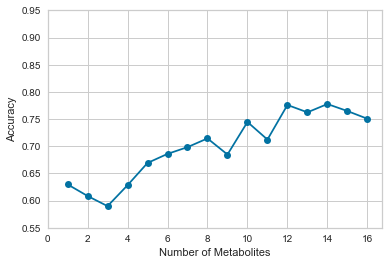

In [28]:
accuracy2_serum('SVC')

 10%|█         | 3/29 [00:00<00:00, 28.35it/s]

['cholesterol']


100%|██████████| 29/29 [00:00<00:00, 48.82it/s]


[[1, 0.6287082362082361]]


 14%|█▍        | 4/29 [00:00<00:00, 33.85it/s]

['cholesterol', 'threonine']


100%|██████████| 29/29 [00:00<00:00, 48.63it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772]]


 14%|█▍        | 4/29 [00:00<00:00, 35.09it/s]

['cholesterol', 'threonine', 'uric acid']


100%|██████████| 29/29 [00:00<00:00, 46.78it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639]]


 14%|█▍        | 4/29 [00:00<00:00, 34.80it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid']


100%|██████████| 29/29 [00:00<00:00, 47.34it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145]]


 14%|█▍        | 4/29 [00:00<00:00, 34.19it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 47.74it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885]]


 10%|█         | 3/29 [00:00<00:00, 28.85it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine']


100%|██████████| 29/29 [00:00<00:00, 47.65it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561]]


 14%|█▍        | 4/29 [00:00<00:00, 33.33it/s]

['cholesterol', 'threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 46.35it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562]]


 14%|█▍        | 4/29 [00:00<00:00, 33.45it/s]

['cholesterol', 'threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 48.29it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533]]


 10%|█         | 3/29 [00:00<00:00, 29.99it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine']


100%|██████████| 29/29 [00:00<00:00, 46.82it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533], [9, 0.7444104506604506]]


 10%|█         | 3/29 [00:00<00:00, 29.45it/s]

['cholesterol', 'threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'aspartic acid', 'deoxypentitol', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.69it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533], [9, 0.7444104506604506], [10, 0.7632371794871794]]


 10%|█         | 3/29 [00:00<00:00, 29.89it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 45.45it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533], [9, 0.7444104506604506], [10, 0.7632371794871794], [11, 0.8369745532245533]]


 14%|█▍        | 4/29 [00:00<00:00, 33.32it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol']


100%|██████████| 29/29 [00:00<00:00, 46.48it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533], [9, 0.7444104506604506], [10, 0.7632371794871794], [11, 0.8369745532245533], [12, 0.8201534576534577]]


 10%|█         | 3/29 [00:00<00:00, 29.99it/s]

['cholesterol', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.64it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533], [9, 0.7444104506604506], [10, 0.7632371794871794], [11, 0.8369745532245533], [12, 0.8201534576534577], [13, 0.7580701243201242]]


 10%|█         | 3/29 [00:00<00:00, 29.99it/s]

['cholesterol', 'threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.62it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533], [9, 0.7444104506604506], [10, 0.7632371794871794], [11, 0.8369745532245533], [12, 0.8201534576534577], [13, 0.7580701243201242], [14, 0.7718482905982906]]


 14%|█▍        | 4/29 [00:00<00:00, 32.90it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.07it/s]


[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533], [9, 0.7444104506604506], [10, 0.7632371794871794], [11, 0.8369745532245533], [12, 0.8201534576534577], [13, 0.7580701243201242], [14, 0.7718482905982906], [15, 0.789597902097902]]


 10%|█         | 3/29 [00:00<00:00, 29.79it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.16it/s]

[[1, 0.6287082362082361], [2, 0.5572338772338772], [3, 0.6001194638694639], [4, 0.5908576146076145], [5, 0.567503885003885], [6, 0.7272717560217561], [7, 0.8312548562548562], [8, 0.8219745532245533], [9, 0.7444104506604506], [10, 0.7632371794871794], [11, 0.8369745532245533], [12, 0.8201534576534577], [13, 0.7580701243201242], [14, 0.7718482905982906], [15, 0.789597902097902], [16, 0.8094259906759907]]


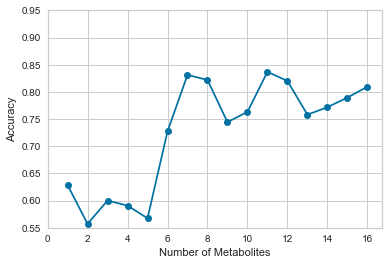

In [29]:
accuracy2_serum('DecisionTreeClassifier')

 14%|█▍        | 4/29 [00:00<00:00, 36.03it/s]

['cholesterol']


100%|██████████| 29/29 [00:00<00:00, 48.79it/s]


[[1, 0.6252991452991452]]


 14%|█▍        | 4/29 [00:00<00:00, 36.03it/s]

['cholesterol', 'threonine']


100%|██████████| 29/29 [00:00<00:00, 47.91it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994]]


 14%|█▍        | 4/29 [00:00<00:00, 32.53it/s]

['cholesterol', 'threonine', 'uric acid']


100%|██████████| 29/29 [00:00<00:00, 46.14it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526]]


 14%|█▍        | 4/29 [00:00<00:00, 33.93it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid']


100%|██████████| 29/29 [00:00<00:00, 48.53it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262]]


 14%|█▍        | 4/29 [00:00<00:00, 34.06it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 45.51it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993]]


 14%|█▍        | 4/29 [00:00<00:00, 34.49it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine']


100%|██████████| 29/29 [00:00<00:00, 47.39it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327]]


 14%|█▍        | 4/29 [00:00<00:00, 35.12it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid']


100%|██████████| 29/29 [00:00<00:00, 47.08it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509]]


 14%|█▍        | 4/29 [00:00<00:00, 33.83it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 46.97it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954]]


 14%|█▍        | 4/29 [00:00<00:00, 34.64it/s]

['cholesterol', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'aspartic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.87it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954], [9, 0.786829836829837]]


 14%|█▍        | 4/29 [00:00<00:00, 33.34it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid']


100%|██████████| 29/29 [00:00<00:00, 42.03it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954], [9, 0.786829836829837], [10, 0.6515977078477079]]


 10%|█         | 3/29 [00:00<00:00, 28.29it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 47.42it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954], [9, 0.786829836829837], [10, 0.6515977078477079], [11, 0.7715520590520591]]


 10%|█         | 3/29 [00:00<00:00, 29.87it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol']


100%|██████████| 29/29 [00:00<00:00, 48.08it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954], [9, 0.786829836829837], [10, 0.6515977078477079], [11, 0.7715520590520591], [12, 0.7457993395493396]]


 14%|█▍        | 4/29 [00:00<00:00, 33.32it/s]

['threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 47.55it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954], [9, 0.786829836829837], [10, 0.6515977078477079], [11, 0.7715520590520591], [12, 0.7457993395493396], [13, 0.7381983294483294]]


 10%|█         | 3/29 [00:00<00:00, 29.34it/s]

['cholesterol', 'threonine', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.00it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954], [9, 0.786829836829837], [10, 0.6515977078477079], [11, 0.7715520590520591], [12, 0.7457993395493396], [13, 0.7381983294483294], [14, 0.7860722610722611]]


  7%|▋         | 2/29 [00:00<00:01, 19.87it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol']


100%|██████████| 29/29 [00:00<00:00, 46.53it/s]


[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954], [9, 0.786829836829837], [10, 0.6515977078477079], [11, 0.7715520590520591], [12, 0.7457993395493396], [13, 0.7381983294483294], [14, 0.7860722610722611], [15, 0.7312490287490288]]


 10%|█         | 3/29 [00:00<00:00, 29.95it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 46.45it/s]

[[1, 0.6252991452991452], [2, 0.6232060994560994], [3, 0.6826806526806526], [4, 0.6498572261072262], [5, 0.6044560994560993], [6, 0.6040394327894327], [7, 0.6322212509712509], [8, 0.6641656954156954], [9, 0.786829836829837], [10, 0.6515977078477079], [11, 0.7715520590520591], [12, 0.7457993395493396], [13, 0.7381983294483294], [14, 0.7860722610722611], [15, 0.7312490287490288], [16, 0.7368045843045843]]


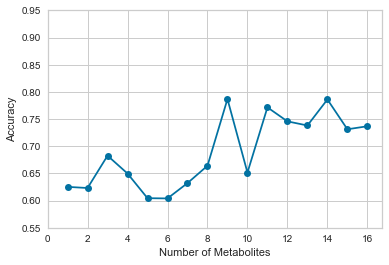

In [31]:
accuracy2_serum('GaussianNB')